In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the dataset
df.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Basic info about the dataset
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Exploration and Cleaning

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
# Unique values in categorical columns
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'smoker':", df['smoker'].unique())
print("Unique values in 'region':", df['region'].unique())

Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']


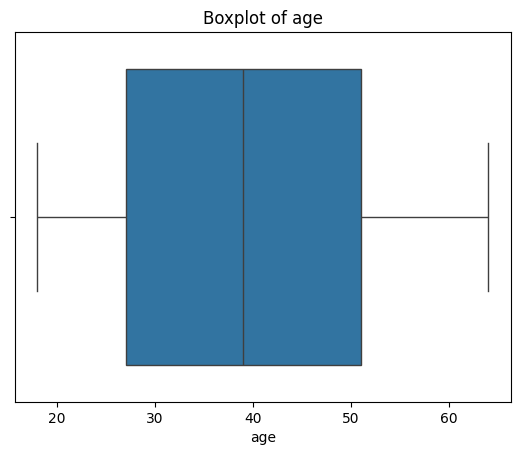

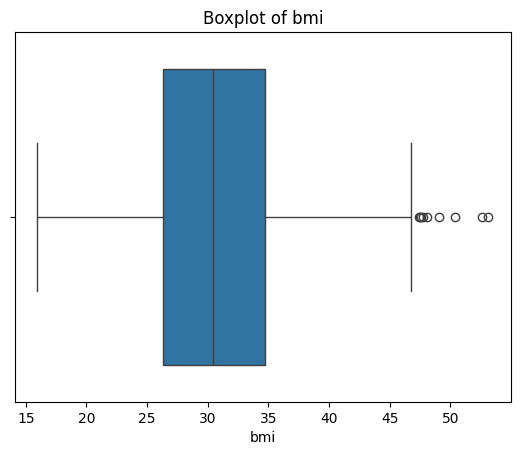

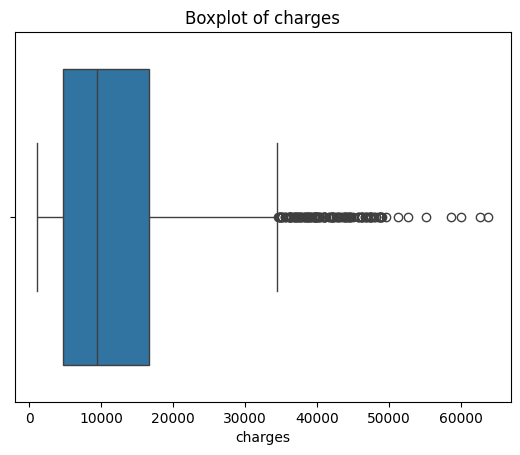

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn and assign it to the alias 'sns'

# Visualize outliers in numerical columns
numerical_columns = ['age', 'bmi', 'charges']
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

statistical detection of outliers using Z-scores

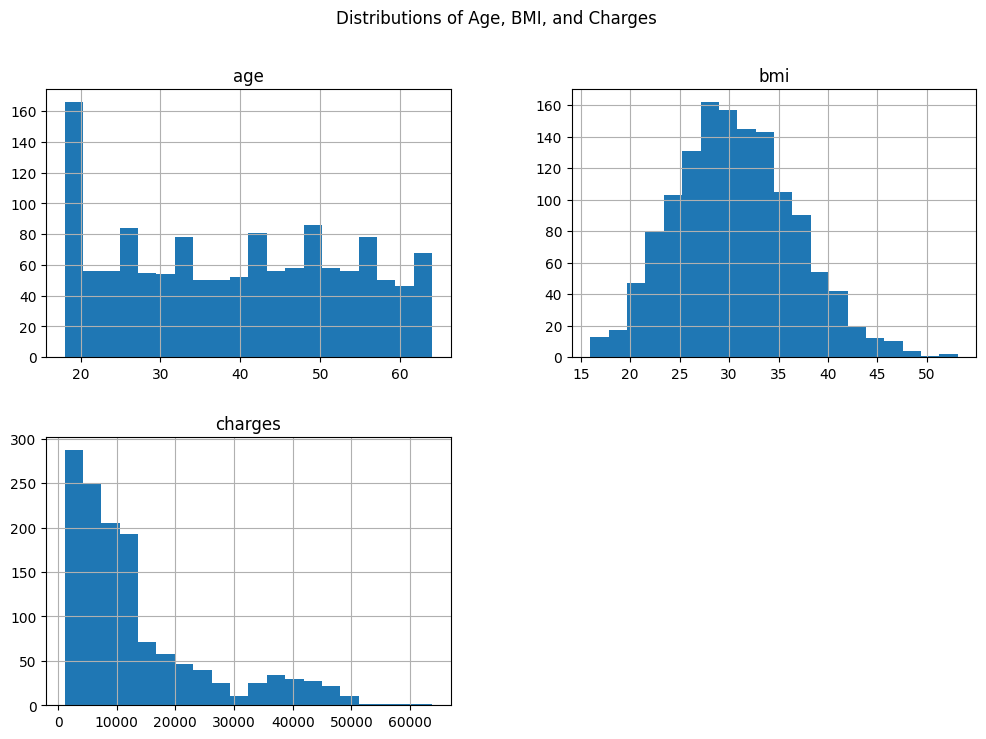

In [8]:
# Histograms for numerical columns
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Age, BMI, and Charges")
plt.show()

In [6]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Identify rows where Z-score is > 3 (outliers)
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers detected:", outliers.sum())

Number of outliers detected: 11


Analyze Outliers

In [9]:
# Filter rows that are identified as outliers
outlier_rows = df[(z_scores > 3).any(axis=1)]
print("Outlier Rows:\n", outlier_rows)

Outlier Rows:
       age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
116    58    male  49.060         0     no  southeast  11381.32540
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
847    23    male  50.380         1     no  southeast   2438.05520
1047   22    male  52.580         1    yes  southeast  44501.39820
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
1317   18    male  53.130         0     no  southeast   1163.46270


Handling Outliers

In [10]:
# Identify low-charge anomalies
low_charge_anomalies = df[(df['charges'] < 2000) & (df['bmi'] > 50)]
df = df.drop(low_charge_anomalies.index)
# Cap charges at the 95th percentile
charges_cap = df['charges'].quantile(0.95)
df['charges'] = df['charges'].clip(upper=charges_cap)

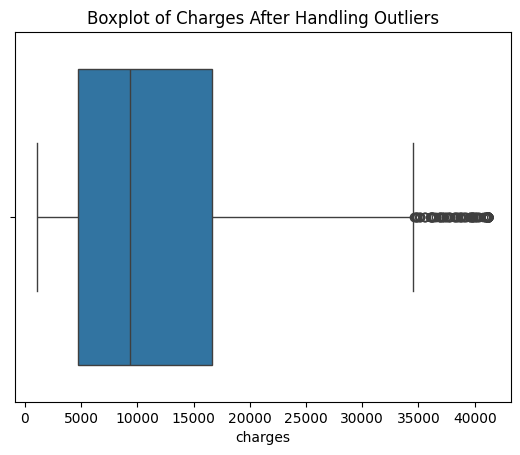

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222887    30.646593     1.095737  13010.112663
std      14.043228     6.069401     1.205571  11357.790587
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.675000     2.000000  16657.717450
max      64.000000    52.580000     5.000000  41210.049800


In [11]:
# Recheck the boxplot for charges
sns.boxplot(x=df['charges'])
plt.title("Boxplot of Charges After Handling Outliers")
plt.show()

# Summary statistics
print(df.describe())

Aggregating Data for Trends

In [13]:
# Encode categorical variables
df['sex_encoded'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Select numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numerical_columns.corr()

# Display the correlation with 'charges'
print(correlation['charges'].sort_values(ascending=False))

charges           1.000000
smoker_encoded    0.792650
age               0.297985
bmi               0.189267
children          0.071363
sex_encoded       0.058635
Name: charges, dtype: float64


Visualize Trends

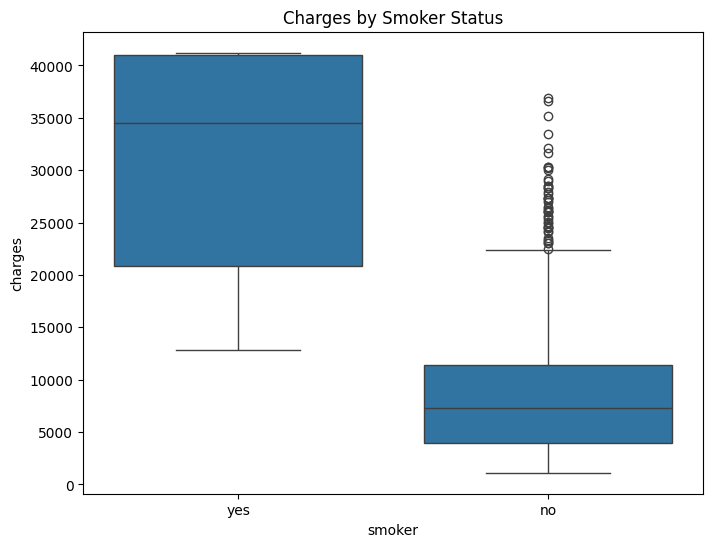

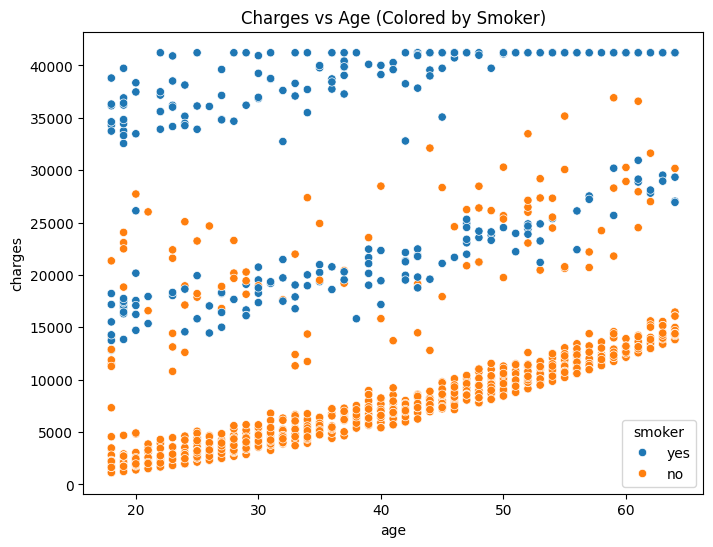

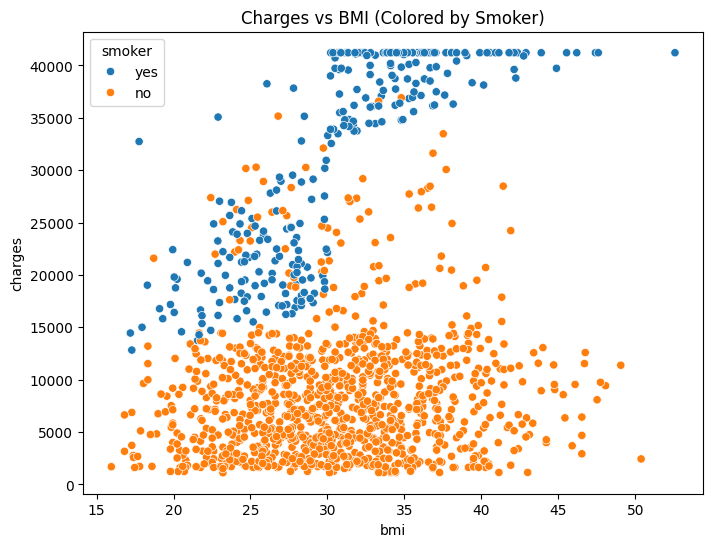

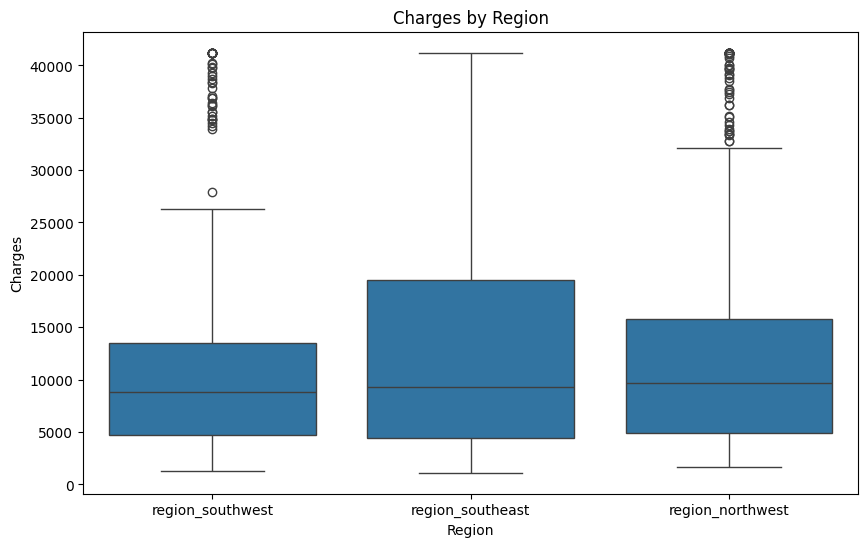

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Boxplot: Charges by Smoker Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()

# 2. Scatter Plot: Charges vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (Colored by Smoker)")
plt.show()

# 3. Scatter Plot: Charges vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (Colored by Smoker)")
plt.show()

# 4. Boxplot: Charges by Region (Encoded as Dummies)
region_columns = [col for col in df.columns if 'region_' in col]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[region_columns].idxmax(axis=1), y='charges', data=df)
plt.title("Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

Hypothesis testing

T-test for Smokers vs Non-Smokers:

In [15]:
from scipy.stats import ttest_ind

# Split the data into smokers and non-smokers
smokers = df[df['smoker_encoded'] == 1]['charges']
non_smokers = df[df['smoker_encoded'] == 0]['charges']

# Perform the t-test
t_stat, p_value = ttest_ind(smokers, non_smokers)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges between smokers and non-smokers.")

T-statistic: 47.50316650813255
P-value: 3.5305557730508726e-289
Reject the null hypothesis: There is a significant difference in charges between smokers and non-smokers.


Linear Regression for Age and BMI with Smoking as a Factor:

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Build the regression formula
formula = 'charges ~ age + bmi + smoker_encoded'

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1348.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:24:54   Log-Likelihood:                -13449.
No. Observations:                1337   AIC:                         2.691e+04
Df Residuals:                    1333   BIC:                         2.693e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9801.2241    872.979    -11.

ANOVA for Charges by Region:

In [19]:
from scipy.stats import f_oneway

# Group data by region encoded columns (instead of 'region')
southwest_region = df[df['region_southwest'] == 1]['charges']
southeast_region = df[df['region_southeast'] == 1]['charges']
northwest_region = df[df['region_northwest'] == 1]['charges']

# Perform ANOVA
f_stat, p_value = f_oneway(southwest_region, southeast_region, northwest_region)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in charges across regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges across regions.")

F-statistic: 4.1340941683627275
P-value: 0.016289013192811327
Reject the null hypothesis: There is a significant difference in charges across regions.


Predictive Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Display the coefficients (importance of each feature)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nModel Coefficients:")
print(coefficients)

Mean Absolute Error (MAE): 3947.7445074071284
Mean Squared Error (MSE): 30267616.398653843
R-squared: 0.8123139491077782

Model Coefficients:
                   Coefficient
age                 238.747546
bmi                 279.544921
children            543.109070
sex_encoded        -209.017172
smoker_encoded    21840.047965
region_northwest   -341.516112
region_southeast  -1037.642509
region_southwest   -697.831686


Random Forest Regression:

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions using the best model
rf_best_model = grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest - MAE: 2101.4443352402936
Random Forest - MSE: 16655391.908038827
Random Forest - R-squared: 0.8967218068278048


Gradient Boosting Machines (GBM):

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=3, n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found for GBM: ", grid_search_gbm.best_params_)

# Make predictions using the best model
gbm_best_model = grid_search_gbm.best_estimator_
y_pred_gbm = gbm_best_model.predict(X_test)

# Evaluate the GBM model
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"GBM - MAE: {mae_gbm}")
print(f"GBM - MSE: {mse_gbm}")
print(f"GBM - R-squared: {r2_gbm}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found for GBM:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
GBM - MAE: 2259.223855316936
GBM - MSE: 16287254.211141637
GBM - R-squared: 0.8990045868658875


Feature Importance for Random Forest:

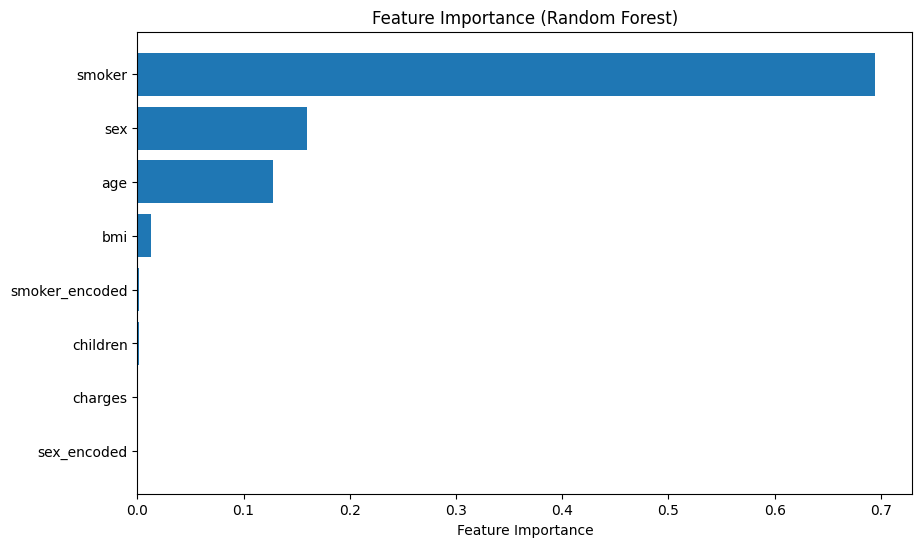

In [24]:
import matplotlib.pyplot as plt

# Get feature importance for Random Forest
feature_importance_rf = rf_best_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx_rf = feature_importance_rf.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[sorted_idx_rf], feature_importance_rf[sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


Feature Importance for GBM:

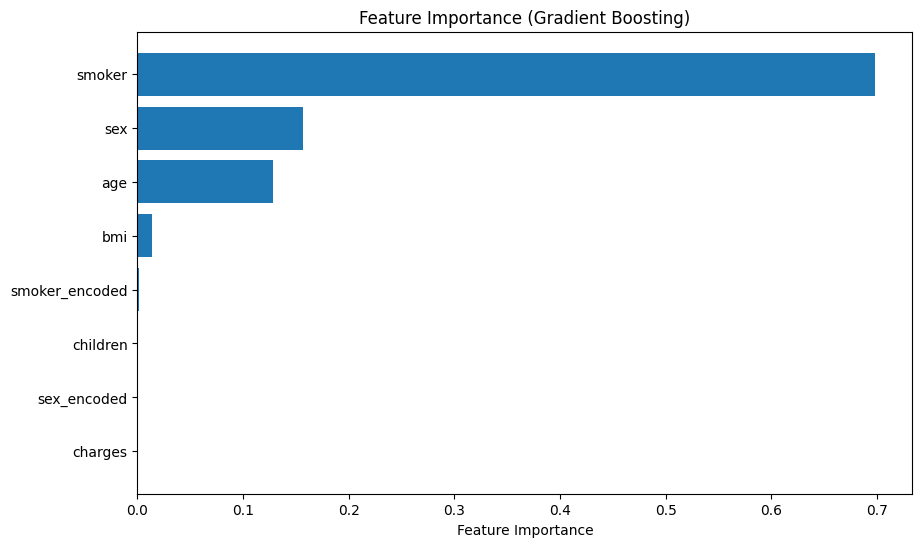

In [25]:
# Get feature importance for GBM
feature_importance_gbm = gbm_best_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx_gbm = feature_importance_gbm.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[sorted_idx_gbm], feature_importance_gbm[sorted_idx_gbm])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()


Save the Best Model (Random Forest)

In [28]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save the Random Forest model
joblib.dump(rf_best_model, 'random_forest_model.pkl')

# Load the saved model
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Example: Creating a sample new_data DataFrame (replace with your actual data)
new_data = pd.DataFrame({
    'age': [30, 45, 22],
    'bmi': [25, 30, 20],
    'children': [0, 2, 1],
    'sex_encoded': [1, 0, 1],  # Assuming 'male': 1, 'female': 0
    'smoker_encoded': [0, 1, 0],  # Assuming 'yes': 1, 'no': 0
    'region_northwest': [0, 1, 0],
    'region_southeast': [1, 0, 0],
    'region_southwest': [0, 0, 1]
})

# Make predictions on the new data
predictions = loaded_rf_model.predict(new_data)

# Example: Assuming you have new_test_data and true_labels
# Assuming new_test_data and true_labels are pre-loaded DataFrames/Arrays

# Example test data (replace with actual test data)
new_test_data = pd.DataFrame({
    'age': [50, 60],
    'bmi': [28, 33],
    'children': [1, 3],
    'sex_encoded': [1, 0],
    'smoker_encoded': [1, 0],
    'region_northwest': [0, 1],
    'region_southeast': [0, 1],
    'region_southwest': [1, 0]
})

# Example true labels (replace with actual true labels)
true_labels = [5000, 6000]  # Example values

# Make predictions on the test data
predictions_test = loaded_rf_model.predict(new_test_data)

# Evaluate the model performance
mae = mean_absolute_error(true_labels, predictions_test)
mse = mean_squared_error(true_labels, predictions_test)
r2 = r2_score(true_labels, predictions_test)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 17103.50408757409
MSE: 318389452.7493498
R-squared: -1272.5578109973992


  Cost Optimization Strategies

Total Original Healthcare Costs: $17,394,520.63
Total Reduced Healthcare Costs: $15,908,954.14
Total Cost Reduction: $1,485,566.49
Percentage Reduction in Healthcare Costs: 8.54%


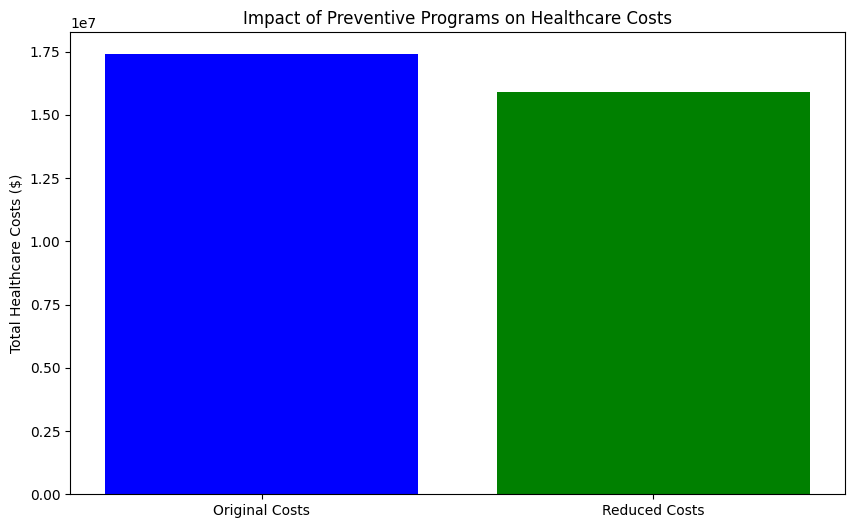

In [30]:
# 1. **Identifying High-Risk Groups:**
# Create a new column with predicted charges for the entire dataset (not just X_test)
df['predicted_charges'] = model.predict(df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded',
                                            'region_northwest', 'region_southeast', 'region_southwest']])  # Use the features used for the model

# Define thresholds for high-risk groups:
high_risk_bmi_threshold = 30  # BMI above this threshold indicates higher healthcare costs
high_risk_age_threshold = 50  # Age above this threshold indicates higher healthcare costs
high_risk_smoking_threshold = 'yes'  # Smoking increases healthcare costs

# Identify high-risk individuals based on multiple criteria
df['high_risk'] = np.where(
    (df['bmi'] > high_risk_bmi_threshold) |
    (df['age'] > high_risk_age_threshold) |
    (df['smoker'] == high_risk_smoking_threshold),
    1, 0)  # Mark high-risk individuals as 1

# 2. **Simulating Preventive Programs:**
# For individuals with high BMI, suggest lifestyle changes
df['bmi_preventive_program'] = np.where(df['bmi'] > high_risk_bmi_threshold, 'Lifestyle change', 'No intervention')

# For smokers, suggest a smoking cessation program
df['smoking_program'] = np.where(df['smoker'] == high_risk_smoking_threshold, 'Quit Smoking Program', 'No intervention')

# For older adults, suggest regular check-ups and screenings
df['age_preventive_program'] = np.where(df['age'] > high_risk_age_threshold, 'Regular check-ups', 'No intervention')

# 3. **Tracking the Impact of Interventions:**
# We can simulate the potential impact on charges if these programs are implemented. For simplicity, let's assume a fixed reduction in charges for those who participate in preventive programs.

# Simulate a reduction of 10% for each preventive program
df['reduced_charges_bmi'] = np.where(df['bmi_preventive_program'] == 'Lifestyle change', df['charges'] * 0.90, df['charges'])
df['reduced_charges_smoking'] = np.where(df['smoking_program'] == 'Quit Smoking Program', df['charges'] * 0.90, df['charges'])
df['reduced_charges_age'] = np.where(df['age_preventive_program'] == 'Regular check-ups', df['charges'] * 0.90, df['charges'])

# Calculate the final reduced charges after all programs
df['final_reduced_charges'] = df[['reduced_charges_bmi', 'reduced_charges_smoking', 'reduced_charges_age']].min(axis=1)

# 4. **Reviewing the Effectiveness of the Intervention:**
# Compare the total healthcare costs before and after interventions.
total_original_costs = df['charges'].sum()
total_reduced_costs = df['final_reduced_charges'].sum()

# Calculate the overall reduction in costs
cost_reduction = total_original_costs - total_reduced_costs
cost_reduction_percentage = (cost_reduction / total_original_costs) * 100

print(f"Total Original Healthcare Costs: ${total_original_costs:,.2f}")
print(f"Total Reduced Healthcare Costs: ${total_reduced_costs:,.2f}")
print(f"Total Cost Reduction: ${cost_reduction:,.2f}")
print(f"Percentage Reduction in Healthcare Costs: {cost_reduction_percentage:.2f}%")

# 5. **Visualizing the Impact of Interventions:**
import matplotlib.pyplot as plt

# Bar chart showing the total original vs reduced healthcare costs
plt.figure(figsize=(10,6))
plt.bar(['Original Costs', 'Reduced Costs'], [total_original_costs, total_reduced_costs], color=['blue', 'green'])
plt.ylabel('Total Healthcare Costs ($)')
plt.title('Impact of Preventive Programs on Healthcare Costs')
plt.show()

Simulation of Administrative Cost Reduction

In [32]:
# Calculate total healthcare costs from the 'charges' column in the dataset
total_healthcare_costs = df['charges'].sum()

# Let's assume administrative costs account for 15% of the total healthcare costs
admin_cost_percentage = 0.15

# Simulate a 10% reduction in administrative costs
reduced_admin_costs = admin_cost_percentage * total_healthcare_costs * 0.10  # 10% reduction

# Total healthcare costs after the administrative reduction
total_cost_after_admin_reduction = total_healthcare_costs - reduced_admin_costs

print(f"Original Healthcare Costs: ${total_healthcare_costs:,.2f}")
print(f"Reduced Healthcare Costs (Admin Reduction): ${total_cost_after_admin_reduction:,.2f}")
print(f"Total Administrative Cost Reduction: ${reduced_admin_costs:,.2f}")

Original Healthcare Costs: $17,394,520.63
Reduced Healthcare Costs (Admin Reduction): $17,133,602.82
Total Administrative Cost Reduction: $260,917.81


 Promoting Preventive Care for High-Risk Groups

In [33]:
# Define the threshold for high-risk individuals (e.g., predicted charges above $30,000)
high_risk_threshold = 30000

# Simulate the effect of preventive care (15% reduction) for high-risk groups
df['predicted_charges'] = model.predict(X)  # Ensure you have the predicted charges for the full dataset

# Identify high-risk individuals
high_risk_individuals = df[df['predicted_charges'] > high_risk_threshold]

# Calculate the cost reduction from preventive care (15% reduction for high-risk groups)
preventive_care_reduction = high_risk_individuals['predicted_charges'].sum() * 0.15

# Simulate new healthcare costs after preventive care
total_cost_after_preventive_care = total_healthcare_costs - preventive_care_reduction

print(f"Original Healthcare Costs: ${total_healthcare_costs:,.2f}")
print(f"Healthcare Costs After Preventive Care: ${total_cost_after_preventive_care:,.2f}")
print(f"Total Cost Reduction from Preventive Care: ${preventive_care_reduction:,.2f}")

Original Healthcare Costs: $17,394,520.63
Healthcare Costs After Preventive Care: $16,709,624.14
Total Cost Reduction from Preventive Care: $684,896.49


Optimizing Treatment Pathways for Costly Procedures

In [35]:
# Simulate optimizing treatment pathways (10% reduction in the most costly procedures)
costly_procedures_percentage = 0.30  # Assume 30% of healthcare costs are for costly procedures
optimization_reduction = total_healthcare_costs * costly_procedures_percentage * 0.10  # 10% reduction

# Total healthcare costs after optimizing treatment pathways
total_cost_after_optimization = total_cost_after_preventive_care - optimization_reduction

print(f"Healthcare Costs After Treatment Optimization: ${total_cost_after_optimization:,.2f}")
print(f"Total Cost Reduction from Treatment Optimization: ${optimization_reduction:,.2f}")


Healthcare Costs After Treatment Optimization: $16,187,788.52
Total Cost Reduction from Treatment Optimization: $521,835.62
